### Logistic Regression 

### Classification 

##### Quantative data --> regression 
##### Classification --> labeling

In [5]:
age1 = [ var for var in range(10,25) ]

In [4]:
len(age)

15

In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,4)

In [18]:
age1 = [ var for var in range(10,25) ]
income1 = np.random.randint(10000,20000,15)

In [19]:
age2 = [ var for var in range(26,35)]
income2 = np.random.randint(20000,30000,len(age2))

In [20]:
age = np.array(age1+age2)
income = np.append(income1,income2)

In [21]:
age[:5]

array([10, 11, 12, 13, 14])

In [22]:
income[:5]

array([16881, 18536, 18343, 11776, 17924])

### Quantative Data ( Linear Regression )


$$ \hat y = \beta_0 + \beta_1 x $$

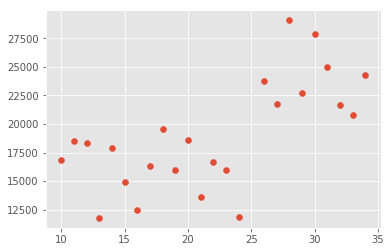

In [23]:
plt.scatter(age,income)
plt.show()

In [67]:
df = pd.read_csv("ISLR_DATASET/default.csv",index_col=0)

In [68]:
df.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


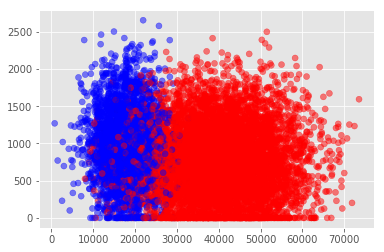

In [69]:
plt.scatter(df['income'],df['balance'],c=df['student'].map(
    {'Yes':'b',"No":'r'},),alpha=0.5)
plt.show()

In [70]:
df['student'] = df['student'].map({"No":1,"Yes":0})

In [71]:
df['student'].head()

1    1
2    0
3    1
4    1
5    1
Name: student, dtype: int64

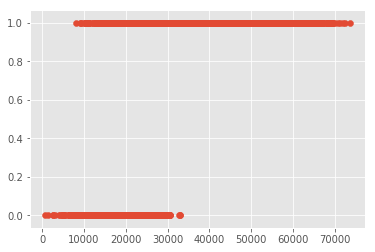

In [72]:
plt.scatter(df["income"],df['student'])
plt.show()

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
model = LinearRegression()

In [75]:
model.fit(df[['income']],df['student'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [76]:
y_pred = model.predict(df[['income']])

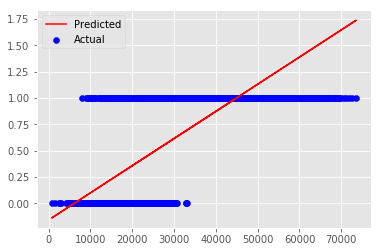

In [77]:
plt.scatter(df['income'],df['student'],c='b',label="Actual")
plt.plot(df['income'],y_pred,c='r',label="Predicted")
plt.legend()
plt.show()

In [78]:
from sklearn.metrics import r2_score,mean_squared_error

In [79]:
r2_score(df['student'],y_pred)

0.5684938882023318

In [80]:
mean_squared_error(df['student'],y_pred)

0.08963617775541756

### Logistic Regression 

##### Probability

$$ p =  \frac {\text {favourable outcomes} } { \text{total outcomes} } $$ 

##### Odds Probability 
$$ p(X) = p(x=student|income) $$
 $$ p(X) = \frac {p(x)}  {1-p(x)} $$

$$ y = \beta_0 + \beta1 X $$ 

$$ \log {\frac {p(X)}  {1-p(X)}} = \beta_0 + \beta1 X $$

$$ \frac {p(X)} {1-p(X)} = e^{\beta_0+\beta_1 X} $$

$$ p(X) = (1-p(X))e^{\beta_0+\beta_1X} $$

$$ p(X) = e^{\beta_0+\beta_1 X}-p(X) e^{\beta_0+\beta_1 X} $$

$$p(X) + p(X) e^{\beta_0+\beta_1 X} =  e^{\beta_0+\beta_1 X}  $$

$$ p(X) ( 1 +  e^{\beta_0+\beta_1 X}) =  e^{\beta_0+\beta_1 X} $$

$$ p(X) =  \frac {e^{\beta_0+\beta_1 X}} {1 +  e^{\beta_0+\beta_1 X}} $$

$$ f(x) = \frac {1} {1+e^{-z}} $$


**where p(X) = p(y='student'|income) and f(x) is logit function 0 < f(x) < 1 , it is a s shape curve**

In [81]:
from sklearn.linear_model import LogisticRegression

In [112]:
model = LogisticRegression()

In [113]:
model.fit(df[['income']],df['student'])

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [114]:
y_pred = model.predict(df[['income']])

In [115]:
y_pred[:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [116]:
data = model.predict_proba(df[['income']])

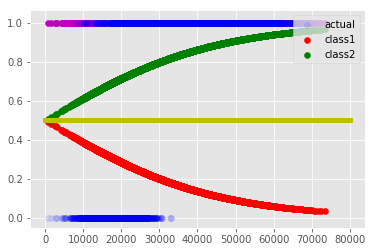

In [117]:
plt.scatter(df['income'],y_pred,c='m')
plt.scatter(df['income'],df['student'],label='actual',c='b',alpha=0.1)
plt.scatter(df['income'],data[:,0],label='class1',c='r')
plt.scatter(df['income'],data[:,1],label='class2',c='g')
plt.plot([0,80000],[0.5,0.5],c='y',lw=5)
plt.legend(loc=1)
plt.show()
# p(x), 1-p(x)

### Classification Report, confusion matrix , Accuracy score

In [118]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [119]:
confusion_matrix(df['student'],y_pred)

array([[   0, 2944],
       [   0, 7056]], dtype=int64)

In [120]:
accuracy_score(df['student'],y_pred)

0.7056

                                   prediction
                
                              student     not student 
          
            student            0              2944              2944 ( 30 ) 
    actual 
            not student        0              7056             7056  ( 70 )
            
                               0              10000 

In [121]:
df = pd.read_csv('ISLR_DATASET/default.csv',index_col=0)

In [122]:
df.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


In [123]:
feature = df[['balance']]

In [124]:
target = df['default'].map({"No":0,'Yes':1})

In [125]:
feature.head()

,balance
1,729.526495
2,817.180407
3,1073.549164
4,529.250605
5,785.655883


In [126]:
target.head()

1    0
2    0
3    0
4    0
5    0
Name: default, dtype: int64

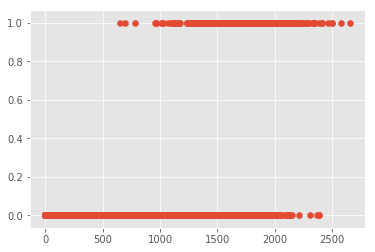

In [128]:
plt.scatter(feature,target)
plt.show()

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X_train,X_test,y_train,y_test = train_test_split(feature,target)

In [131]:
X_train.head()

,balance
3704,1447.022281
5839,206.016345
7060,767.139212
5603,309.517982
9867,599.718846


In [132]:
y_train.head()

3704    0
5839    0
7060    0
5603    0
9867    0
Name: default, dtype: int64

In [133]:
target.value_counts()

0    9667
1     333
Name: default, dtype: int64

In [134]:
from sklearn.linear_model import LogisticRegression

In [135]:
model  = LogisticRegression()

In [137]:
model.fit(X_train,y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [138]:
y_pred = model.predict(X_test)

In [141]:
y_pred[y_pred != 0 ]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [147]:
yes = model.predict_proba(X_test)[:,0]
no = model.predict_proba(X_test)[:,1]

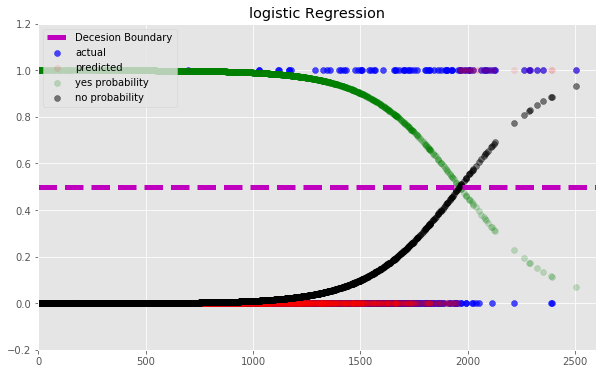

In [157]:

plt.figure(figsize=(10,6))
plt.scatter(X_test,y_test,c='b',label="actual",alpha=0.7)
plt.scatter(X_test,y_pred,c='r',label='predicted',alpha=0.1)
plt.scatter(X_test,yes,c='g',label="yes probability",alpha=0.2)
plt.scatter(X_test,no,c='k',label="no probability",alpha=0.5)
plt.plot([0,2700],[0.5,0.5],'m--',lw=5,label='Decesion Boundary')
plt.ylim([-0.2,1.2])
plt.xlim([0,2600])
plt.title("logistic Regression")
plt.legend(loc=2)
plt.show()

In [158]:
confusion_matrix(y_test,y_pred)

array([[2411,   12],
       [  54,   23]], dtype=int64)

In [159]:
accuracy_score(y_test,y_pred)

0.9736

In [160]:
iris = sns.load_dataset('iris')

In [161]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [163]:
feature = iris.drop("species",axis=1)

In [164]:
target = iris['species']

In [165]:
feature.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [166]:
target.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [167]:
target.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [168]:
map_dict = { 'setosa':0, 'versicolor':1, 'virginica':2}

In [169]:
target = target.map(map_dict)

In [170]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [171]:
feature.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [176]:
feature.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### scaling mean, sd 

#### normal distribuation , standard normal distribution 

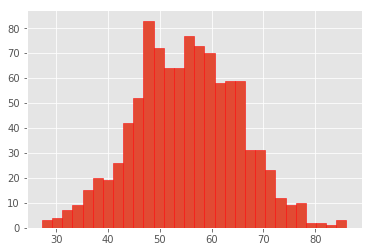

In [173]:
a = np.random.normal(55,10,1000)
plt.hist(a,bins=30,edgecolor='r')
plt.show()

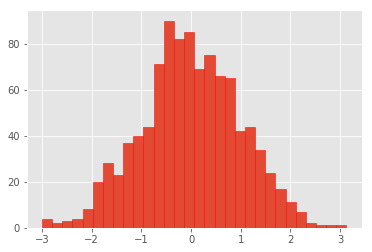

In [174]:
a = np.random.normal(0,1,1000)
plt.hist(a,bins=30,edgecolor='r')
plt.show()

In [177]:
from sklearn.preprocessing import StandardScaler

In [178]:
scale = StandardScaler()

In [179]:
scale

StandardScaler(copy=True, with_mean=True, with_std=True)

In [180]:
scale.fit(feature)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [181]:
scaled_features = scale.transform(feature)

In [ ]:
# 1000 --> 2 cm ( training )

# 1500 ---> 3 cm ( Transorm)

In [183]:
feature[:5]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [185]:
scaled_features = pd.DataFrame(scaled_features,columns=feature.columns)

In [186]:
scaled_features[:5]

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [188]:
X_train,X_test,y_train,y_test = train_test_split(scaled_features,target,test_size=0.3,random_state=101)

In [189]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
13,-1.870024,-0.131979,-1.510739,-1.447076
102,1.522676,-0.131979,1.217458,1.185567
67,-0.052506,-0.822570,0.194384,-0.262387
34,-1.143017,0.098217,-1.283389,-1.315444
98,-0.900681,-1.282963,-0.430828,-0.130755


In [191]:
y_train[:5]

13     0
102    2
67     1
34     0
98     1
Name: species, dtype: int64

In [192]:
model = LogisticRegression()

In [193]:
model.fit(X_train,y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [194]:
y_pred = model.predict(X_test)

In [195]:
accuracy_score(y_test,y_pred)

0.8444444444444444

In [196]:
confusion_matrix(y_test,y_pred)

array([[13,  0,  0],
       [ 0, 14,  6],
       [ 0,  1, 11]], dtype=int64)

In [197]:
y_test[:5]

33     0
16     0
43     0
129    2
50     1
Name: species, dtype: int64

In [198]:
y_pred[:5]

array([0, 0, 0, 2, 2], dtype=int64)

In [199]:
# breast cancer 
# titanic 
# classification --> face regonication

### Navie Bays 